# Cellpose loop over local files

In [1]:
# Run under cellpose conda environment
import os
import time
from skimage.morphology import white_tophat, black_tophat, disk
import numpy as np
import tifffile
from cellpose import models, io
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob
import cv2
from tqdm import tqdm
from cellpose import models

## Test on one image

D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_28h_TIF\CoV-FISH-06B_R2_28h_INF_00016.tif
>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
time spent: running network 1.29s; flow+mask computation 0.75
estimated masks for 1 image(s) in 2.12 sec
>>>> TOTAL TIME 2.13 sec
Time spent in current image: 0.4 minutes


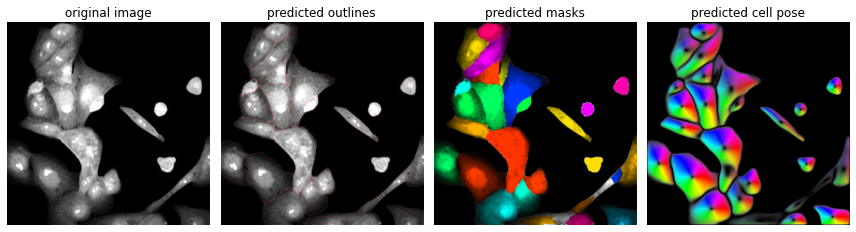

In [50]:
# Directory and single image file name
indir = 'D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_28h_TIF'
file_name = 'CoV-FISH-06B_R2_28h_INF_00016.tif'

# Parameters
chan = 1
diameter = 325
flow_threshold = 0.9
median = 20
do_3D = False
gpu = False

# Run cellpose
t1 = time.time()
print(os.path.join(indir, file_name))
seg_img = np.max(tifffile.imread(os.path.join(indir,file_name)),0)
seg_img = ndimage.median_filter(seg_img[chan], size = median)

model = models.Cellpose(gpu=gpu, model_type='cyto')
masks, flows, styles, diams = model.eval(seg_img, channels = [0,0], diameter = diameter, do_3D = do_3D, flow_threshold = flow_threshold)

t2 = time.time()
time_elapsed = (t2 - t1) / 60
print('Time spent in current image: %s minutes' % round(time_elapsed,1))

# Inspect cellpose output
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, seg_img, masks, flows[0], channels = [0.0])
plt.tight_layout()
plt.show()

## Define folder containing image files

In [57]:
files = glob('D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\*.tif')

for i in files:
    print (i)

D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00001.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00002.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00003.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00004.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00005.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00006.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00007.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00008.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00009.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00010.tif
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\

## Run Cellpose and loop over all files

In [58]:
# Parameters
chan = 1
diameter = 325
flow_threshold = 0.9 
median = 20
do_3D = False
gpu = False

In [59]:
model = models.Cellpose(gpu=gpu, model_type='cyto')

t0 = time.time()

for file in tqdm(files):
    t1 = time.time()
    print(file)
    img = np.max(tifffile.imread(file), 0)
    seg_img = ndimage.median_filter(img[chan], size = median)
    
    masks, flows, styles, diams = model.eval(seg_img, channels = [0,0], diameter = diameter, do_3D = do_3D, flow_threshold = flow_threshold)
    
    #Save the label
    label_name = file.replace(".tif", "_label.tif")
    cv2.imwrite(label_name, masks.astype(np.uint16))
    t2 = time.time()
    time_elapsed = (t2 - t1) / 60
    print('Time spent in current image: %s minutes' % round(time_elapsed,1))
    print('------')


t3 = time.time()
total_time = (t3 - t0) / 60

print('Total time taken: %s minutes' % round(total_time,1))


  0%|                                                                                           | 0/90 [00:00<?, ?it/s]

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00001.tif
processing 1 image(s)


  1%|▉                                                                                  | 1/90 [00:31<46:59, 31.68s/it]

time spent: running network 8.23s; flow+mask computation 1.35
estimated masks for 1 image(s) in 9.69 sec
>>>> TOTAL TIME 9.69 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00002.tif
processing 1 image(s)


  2%|█▊                                                                                 | 2/90 [01:03<46:16, 31.55s/it]

time spent: running network 4.13s; flow+mask computation 1.16
estimated masks for 1 image(s) in 5.39 sec
>>>> TOTAL TIME 5.39 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00003.tif
processing 1 image(s)


  3%|██▊                                                                                | 3/90 [01:30<42:55, 29.60s/it]

time spent: running network 3.86s; flow+mask computation 0.72
estimated masks for 1 image(s) in 4.76 sec
>>>> TOTAL TIME 4.76 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00004.tif
processing 1 image(s)


  4%|███▋                                                                               | 4/90 [01:58<41:47, 29.16s/it]

time spent: running network 4.09s; flow+mask computation 1.48
estimated masks for 1 image(s) in 5.74 sec
>>>> TOTAL TIME 5.74 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00005.tif
processing 1 image(s)


  6%|████▌                                                                              | 5/90 [02:26<40:34, 28.64s/it]

time spent: running network 3.65s; flow+mask computation 1.31
estimated masks for 1 image(s) in 5.09 sec
>>>> TOTAL TIME 5.10 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00006.tif
processing 1 image(s)


  7%|█████▌                                                                             | 6/90 [02:52<38:56, 27.81s/it]

time spent: running network 2.16s; flow+mask computation 1.06
estimated masks for 1 image(s) in 3.41 sec
>>>> TOTAL TIME 3.41 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00007.tif
processing 1 image(s)


  8%|██████▍                                                                            | 7/90 [03:19<37:53, 27.39s/it]

time spent: running network 2.50s; flow+mask computation 1.29
estimated masks for 1 image(s) in 3.91 sec
>>>> TOTAL TIME 3.91 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00008.tif
processing 1 image(s)


  9%|███████▍                                                                           | 8/90 [03:45<36:53, 26.99s/it]

time spent: running network 2.06s; flow+mask computation 1.23
estimated masks for 1 image(s) in 3.40 sec
>>>> TOTAL TIME 3.40 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00009.tif
processing 1 image(s)


 10%|████████▎                                                                          | 9/90 [04:11<36:08, 26.77s/it]

time spent: running network 2.76s; flow+mask computation 0.72
estimated masks for 1 image(s) in 3.61 sec
>>>> TOTAL TIME 3.62 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00010.tif
processing 1 image(s)


 11%|█████████                                                                         | 10/90 [04:39<36:02, 27.04s/it]

time spent: running network 3.62s; flow+mask computation 1.17
estimated masks for 1 image(s) in 4.89 sec
>>>> TOTAL TIME 4.93 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00011.tif
processing 1 image(s)


 12%|██████████                                                                        | 11/90 [05:06<35:39, 27.08s/it]

time spent: running network 2.25s; flow+mask computation 1.44
estimated masks for 1 image(s) in 3.85 sec
>>>> TOTAL TIME 3.85 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00012.tif
processing 1 image(s)


 13%|██████████▉                                                                       | 12/90 [05:33<35:03, 26.96s/it]

time spent: running network 1.68s; flow+mask computation 1.19
estimated masks for 1 image(s) in 3.03 sec
>>>> TOTAL TIME 3.03 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00013.tif
processing 1 image(s)


 14%|███████████▊                                                                      | 13/90 [05:59<34:21, 26.77s/it]

time spent: running network 2.39s; flow+mask computation 0.99
estimated masks for 1 image(s) in 3.54 sec
>>>> TOTAL TIME 3.58 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00014.tif
processing 1 image(s)


 16%|████████████▊                                                                     | 14/90 [06:26<33:49, 26.71s/it]

time spent: running network 2.67s; flow+mask computation 1.07
estimated masks for 1 image(s) in 3.88 sec
>>>> TOTAL TIME 3.88 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00015.tif
processing 1 image(s)


 17%|█████████████▋                                                                    | 15/90 [06:52<33:22, 26.70s/it]

time spent: running network 2.60s; flow+mask computation 1.23
estimated masks for 1 image(s) in 3.97 sec
>>>> TOTAL TIME 3.97 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00016.tif
processing 1 image(s)


 18%|██████████████▌                                                                   | 16/90 [07:19<32:53, 26.66s/it]

time spent: running network 2.72s; flow+mask computation 0.99
estimated masks for 1 image(s) in 3.87 sec
>>>> TOTAL TIME 3.90 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00017.tif
processing 1 image(s)


 19%|███████████████▍                                                                  | 17/90 [07:50<34:12, 28.12s/it]

time spent: running network 4.67s; flow+mask computation 1.21
estimated masks for 1 image(s) in 6.13 sec
>>>> TOTAL TIME 6.17 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00018.tif
processing 1 image(s)


 20%|████████████████▍                                                                 | 18/90 [08:18<33:24, 27.84s/it]

time spent: running network 3.04s; flow+mask computation 1.28
estimated masks for 1 image(s) in 4.51 sec
>>>> TOTAL TIME 4.53 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00019.tif
processing 1 image(s)


 21%|█████████████████▎                                                                | 19/90 [08:45<32:52, 27.79s/it]

time spent: running network 3.87s; flow+mask computation 1.23
estimated masks for 1 image(s) in 5.26 sec
>>>> TOTAL TIME 5.27 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_INF_00020.tif
processing 1 image(s)


 22%|██████████████████▏                                                               | 20/90 [09:12<31:54, 27.35s/it]

time spent: running network 2.28s; flow+mask computation 1.28
estimated masks for 1 image(s) in 3.75 sec
>>>> TOTAL TIME 3.76 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_MOCK_00001.tif
processing 1 image(s)


 23%|███████████████████▏                                                              | 21/90 [09:38<31:12, 27.13s/it]

time spent: running network 2.68s; flow+mask computation 1.14
estimated masks for 1 image(s) in 3.95 sec
>>>> TOTAL TIME 3.95 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_MOCK_00002.tif
processing 1 image(s)


 24%|████████████████████                                                              | 22/90 [10:05<30:30, 26.92s/it]

time spent: running network 2.34s; flow+mask computation 0.92
estimated masks for 1 image(s) in 3.42 sec
>>>> TOTAL TIME 3.42 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_MOCK_00003.tif
processing 1 image(s)


 26%|████████████████████▉                                                             | 23/90 [10:31<29:48, 26.70s/it]

time spent: running network 2.58s; flow+mask computation 0.71
estimated masks for 1 image(s) in 3.37 sec
>>>> TOTAL TIME 3.37 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_MOCK_00004.tif
processing 1 image(s)


 27%|█████████████████████▊                                                            | 24/90 [10:58<29:21, 26.69s/it]

time spent: running network 2.59s; flow+mask computation 0.82
estimated masks for 1 image(s) in 3.57 sec
>>>> TOTAL TIME 3.60 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_MOCK_00005.tif
processing 1 image(s)


 28%|██████████████████████▊                                                           | 25/90 [11:25<29:00, 26.78s/it]

time spent: running network 2.24s; flow+mask computation 1.37
estimated masks for 1 image(s) in 3.77 sec
>>>> TOTAL TIME 3.77 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00001.tif
processing 1 image(s)


 29%|███████████████████████▋                                                          | 26/90 [11:50<28:13, 26.46s/it]

time spent: running network 1.81s; flow+mask computation 0.59
estimated masks for 1 image(s) in 2.51 sec
>>>> TOTAL TIME 2.51 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00002.tif
processing 1 image(s)


 30%|████████████████████████▌                                                         | 27/90 [12:18<28:03, 26.72s/it]

time spent: running network 4.14s; flow+mask computation 1.02
estimated masks for 1 image(s) in 5.31 sec
>>>> TOTAL TIME 5.31 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00003.tif
processing 1 image(s)


 31%|█████████████████████████▌                                                        | 28/90 [12:45<27:43, 26.83s/it]

time spent: running network 2.76s; flow+mask computation 1.53
estimated masks for 1 image(s) in 4.38 sec
>>>> TOTAL TIME 4.39 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00004.tif
processing 1 image(s)
time spent: running network 4.14s; flow+mask computation 1.35
estimated masks for 1 image(s) in 5.65 sec
>>>> TOTAL TIME 5.66 sec


 32%|██████████████████████████▍                                                       | 29/90 [13:13<27:39, 27.21s/it]

Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00005.tif
processing 1 image(s)


 33%|███████████████████████████▎                                                      | 30/90 [13:41<27:27, 27.46s/it]

time spent: running network 4.53s; flow+mask computation 1.40
estimated masks for 1 image(s) in 6.08 sec
>>>> TOTAL TIME 6.10 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00006.tif
processing 1 image(s)


 34%|████████████████████████████▏                                                     | 31/90 [14:07<26:43, 27.17s/it]

time spent: running network 2.78s; flow+mask computation 1.16
estimated masks for 1 image(s) in 4.09 sec
>>>> TOTAL TIME 4.11 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00007.tif
processing 1 image(s)


 36%|█████████████████████████████▏                                                    | 32/90 [14:34<26:05, 27.00s/it]

time spent: running network 2.58s; flow+mask computation 1.11
estimated masks for 1 image(s) in 3.84 sec
>>>> TOTAL TIME 3.84 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00008.tif
processing 1 image(s)


 37%|██████████████████████████████                                                    | 33/90 [15:02<25:56, 27.31s/it]

time spent: running network 4.43s; flow+mask computation 1.14
estimated masks for 1 image(s) in 5.70 sec
>>>> TOTAL TIME 5.71 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00009.tif
processing 1 image(s)
time spent: running network 2.70s; flow+mask computation 1.17
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.05 sec


 38%|██████████████████████████████▉                                                   | 34/90 [15:29<25:24, 27.22s/it]

Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00010.tif
processing 1 image(s)


 39%|███████████████████████████████▉                                                  | 35/90 [15:57<25:09, 27.44s/it]

time spent: running network 4.03s; flow+mask computation 1.45
estimated masks for 1 image(s) in 5.67 sec
>>>> TOTAL TIME 5.67 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00011.tif
processing 1 image(s)


 40%|████████████████████████████████▊                                                 | 36/90 [16:25<24:48, 27.57s/it]

time spent: running network 4.36s; flow+mask computation 0.94
estimated masks for 1 image(s) in 5.46 sec
>>>> TOTAL TIME 5.46 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00012.tif
processing 1 image(s)


 41%|█████████████████████████████████▋                                                | 37/90 [16:51<24:00, 27.18s/it]

time spent: running network 2.94s; flow+mask computation 0.57
estimated masks for 1 image(s) in 3.62 sec
>>>> TOTAL TIME 3.62 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00013.tif
processing 1 image(s)


 42%|██████████████████████████████████▌                                               | 38/90 [17:19<23:52, 27.54s/it]

time spent: running network 5.14s; flow+mask computation 0.98
estimated masks for 1 image(s) in 6.29 sec
>>>> TOTAL TIME 6.30 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00014.tif
processing 1 image(s)


 43%|███████████████████████████████████▌                                              | 39/90 [17:46<23:08, 27.22s/it]

time spent: running network 2.09s; flow+mask computation 0.95
estimated masks for 1 image(s) in 3.20 sec
>>>> TOTAL TIME 3.20 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00015.tif
processing 1 image(s)


 44%|████████████████████████████████████▍                                             | 40/90 [18:13<22:37, 27.14s/it]

time spent: running network 2.94s; flow+mask computation 0.91
estimated masks for 1 image(s) in 4.04 sec
>>>> TOTAL TIME 4.06 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00016.tif
processing 1 image(s)
time spent: running network 2.83s; flow+mask computation 1.11
estimated masks for 1 image(s) in 4.07 sec
>>>> TOTAL TIME 4.07 sec


 46%|█████████████████████████████████████▎                                            | 41/90 [18:41<22:19, 27.34s/it]

Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00017.tif
processing 1 image(s)


 47%|██████████████████████████████████████▎                                           | 42/90 [19:08<21:47, 27.25s/it]

time spent: running network 2.77s; flow+mask computation 1.00
estimated masks for 1 image(s) in 3.92 sec
>>>> TOTAL TIME 3.95 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00018.tif
processing 1 image(s)


 48%|███████████████████████████████████████▏                                          | 43/90 [19:35<21:20, 27.25s/it]

time spent: running network 4.15s; flow+mask computation 0.84
estimated masks for 1 image(s) in 5.20 sec
>>>> TOTAL TIME 5.20 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00019.tif
processing 1 image(s)


 49%|████████████████████████████████████████                                          | 44/90 [20:02<20:48, 27.14s/it]

time spent: running network 2.24s; flow+mask computation 1.19
estimated masks for 1 image(s) in 3.64 sec
>>>> TOTAL TIME 3.64 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R1_48h_RDV_00020.tif
processing 1 image(s)


 50%|█████████████████████████████████████████                                         | 45/90 [20:24<19:10, 25.57s/it]

time spent: running network 1.23s; flow+mask computation 0.93
estimated masks for 1 image(s) in 2.24 sec
>>>> TOTAL TIME 2.24 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00001.tif
processing 1 image(s)


 51%|█████████████████████████████████████████▉                                        | 46/90 [20:46<17:59, 24.52s/it]

time spent: running network 1.17s; flow+mask computation 1.13
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00002.tif
processing 1 image(s)


 52%|██████████████████████████████████████████▊                                       | 47/90 [21:35<22:55, 31.98s/it]

time spent: running network 1.17s; flow+mask computation 1.15
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
Time spent in current image: 0.8 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00003.tif
processing 1 image(s)


 53%|███████████████████████████████████████████▋                                      | 48/90 [22:36<28:23, 40.56s/it]

time spent: running network 6.42s; flow+mask computation 1.24
estimated masks for 1 image(s) in 7.79 sec
>>>> TOTAL TIME 7.80 sec
Time spent in current image: 1.0 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00004.tif
processing 1 image(s)


 54%|████████████████████████████████████████████▋                                     | 49/90 [23:03<24:58, 36.54s/it]

time spent: running network 3.63s; flow+mask computation 1.12
estimated masks for 1 image(s) in 4.90 sec
>>>> TOTAL TIME 4.91 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00005.tif
processing 1 image(s)


 56%|█████████████████████████████████████████████▌                                    | 50/90 [23:31<22:39, 33.99s/it]

time spent: running network 4.40s; flow+mask computation 1.20
estimated masks for 1 image(s) in 5.76 sec
>>>> TOTAL TIME 5.76 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00006.tif
processing 1 image(s)


 57%|██████████████████████████████████████████████▍                                   | 51/90 [23:59<20:54, 32.17s/it]

time spent: running network 4.03s; flow+mask computation 1.35
estimated masks for 1 image(s) in 5.44 sec
>>>> TOTAL TIME 5.44 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00007.tif
processing 1 image(s)


 58%|███████████████████████████████████████████████▍                                  | 52/90 [24:26<19:19, 30.50s/it]

time spent: running network 2.93s; flow+mask computation 1.03
estimated masks for 1 image(s) in 4.13 sec
>>>> TOTAL TIME 4.17 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00008.tif
processing 1 image(s)


 59%|████████████████████████████████████████████████▎                                 | 53/90 [24:52<18:06, 29.37s/it]

time spent: running network 2.33s; flow+mask computation 1.04
estimated masks for 1 image(s) in 3.53 sec
>>>> TOTAL TIME 3.53 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00009.tif
processing 1 image(s)


 60%|█████████████████████████████████████████████████▏                                | 54/90 [25:20<17:21, 28.93s/it]

time spent: running network 3.45s; flow+mask computation 1.32
estimated masks for 1 image(s) in 4.92 sec
>>>> TOTAL TIME 4.92 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00010.tif
processing 1 image(s)


 61%|██████████████████████████████████████████████████                                | 55/90 [25:47<16:25, 28.17s/it]

time spent: running network 2.00s; flow+mask computation 1.03
estimated masks for 1 image(s) in 3.19 sec
>>>> TOTAL TIME 3.19 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00011.tif
processing 1 image(s)


 62%|███████████████████████████████████████████████████                               | 56/90 [26:14<15:46, 27.85s/it]

time spent: running network 2.16s; flow+mask computation 1.40
estimated masks for 1 image(s) in 3.73 sec
>>>> TOTAL TIME 3.73 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00012.tif
processing 1 image(s)


 63%|███████████████████████████████████████████████████▉                              | 57/90 [26:41<15:10, 27.59s/it]

time spent: running network 2.58s; flow+mask computation 1.24
estimated masks for 1 image(s) in 3.96 sec
>>>> TOTAL TIME 3.97 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00013.tif
processing 1 image(s)


 64%|████████████████████████████████████████████████████▊                             | 58/90 [27:07<14:33, 27.29s/it]

time spent: running network 2.50s; flow+mask computation 1.17
estimated masks for 1 image(s) in 3.80 sec
>>>> TOTAL TIME 3.80 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00014.tif
processing 1 image(s)


 66%|█████████████████████████████████████████████████████▊                            | 59/90 [27:34<14:00, 27.13s/it]

time spent: running network 2.50s; flow+mask computation 1.30
estimated masks for 1 image(s) in 3.95 sec
>>>> TOTAL TIME 3.95 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00015.tif
processing 1 image(s)


 67%|██████████████████████████████████████████████████████▋                           | 60/90 [28:01<13:29, 26.97s/it]

time spent: running network 2.38s; flow+mask computation 1.13
estimated masks for 1 image(s) in 3.67 sec
>>>> TOTAL TIME 3.69 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00016.tif
processing 1 image(s)


 68%|███████████████████████████████████████████████████████▌                          | 61/90 [28:27<12:58, 26.83s/it]

time spent: running network 2.42s; flow+mask computation 0.89
estimated masks for 1 image(s) in 3.44 sec
>>>> TOTAL TIME 3.44 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00017.tif
processing 1 image(s)


 69%|████████████████████████████████████████████████████████▍                         | 62/90 [28:53<12:26, 26.67s/it]

time spent: running network 2.44s; flow+mask computation 0.87
estimated masks for 1 image(s) in 3.46 sec
>>>> TOTAL TIME 3.46 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00018.tif
processing 1 image(s)


 70%|█████████████████████████████████████████████████████████▍                        | 63/90 [29:20<12:00, 26.70s/it]

time spent: running network 3.11s; flow+mask computation 0.89
estimated masks for 1 image(s) in 4.20 sec
>>>> TOTAL TIME 4.20 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00019.tif
processing 1 image(s)


 71%|██████████████████████████████████████████████████████████▎                       | 64/90 [29:48<11:43, 27.07s/it]

time spent: running network 4.88s; flow+mask computation 0.76
estimated masks for 1 image(s) in 5.82 sec
>>>> TOTAL TIME 5.82 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_INF_00020.tif
processing 1 image(s)


 72%|███████████████████████████████████████████████████████████▏                      | 65/90 [30:16<11:22, 27.31s/it]

time spent: running network 4.59s; flow+mask computation 0.98
estimated masks for 1 image(s) in 5.72 sec
>>>> TOTAL TIME 5.72 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_MOCK_00001.tif
processing 1 image(s)


 73%|████████████████████████████████████████████████████████████▏                     | 66/90 [30:44<10:59, 27.50s/it]

time spent: running network 3.66s; flow+mask computation 1.32
estimated masks for 1 image(s) in 5.13 sec
>>>> TOTAL TIME 5.14 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_MOCK_00002.tif
processing 1 image(s)


 74%|█████████████████████████████████████████████████████████████                     | 67/90 [31:12<10:33, 27.56s/it]

time spent: running network 3.91s; flow+mask computation 1.34
estimated masks for 1 image(s) in 5.38 sec
>>>> TOTAL TIME 5.38 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_MOCK_00003.tif
processing 1 image(s)


 76%|█████████████████████████████████████████████████████████████▉                    | 68/90 [31:38<09:57, 27.15s/it]

time spent: running network 3.23s; flow+mask computation 0.63
estimated masks for 1 image(s) in 3.92 sec
>>>> TOTAL TIME 3.93 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_MOCK_00004.tif
processing 1 image(s)


 77%|██████████████████████████████████████████████████████████████▊                   | 69/90 [32:06<09:38, 27.55s/it]

time spent: running network 5.31s; flow+mask computation 1.24
estimated masks for 1 image(s) in 6.67 sec
>>>> TOTAL TIME 6.67 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_MOCK_00005.tif
processing 1 image(s)


 78%|███████████████████████████████████████████████████████████████▊                  | 70/90 [32:34<09:13, 27.67s/it]

time spent: running network 4.50s; flow+mask computation 0.89
estimated masks for 1 image(s) in 5.57 sec
>>>> TOTAL TIME 5.57 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00001.tif
processing 1 image(s)


 79%|████████████████████████████████████████████████████████████████▋                 | 71/90 [33:02<08:46, 27.70s/it]

time spent: running network 4.67s; flow+mask computation 1.17
estimated masks for 1 image(s) in 5.96 sec
>>>> TOTAL TIME 5.96 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00002.tif
processing 1 image(s)


 80%|█████████████████████████████████████████████████████████████████▌                | 72/90 [33:30<08:18, 27.71s/it]

time spent: running network 4.29s; flow+mask computation 0.77
estimated masks for 1 image(s) in 5.22 sec
>>>> TOTAL TIME 5.23 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00003.tif
processing 1 image(s)


 81%|██████████████████████████████████████████████████████████████████▌               | 73/90 [33:58<07:52, 27.78s/it]

time spent: running network 4.56s; flow+mask computation 1.45
estimated masks for 1 image(s) in 6.17 sec
>>>> TOTAL TIME 6.17 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00004.tif
processing 1 image(s)
time spent: running network 3.87s; flow+mask computation 0.90
estimated masks for 1 image(s) in 4.92 sec
>>>> TOTAL TIME 4.96 sec


 82%|███████████████████████████████████████████████████████████████████▍              | 74/90 [34:26<07:25, 27.84s/it]

Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00005.tif
processing 1 image(s)


 83%|████████████████████████████████████████████████████████████████████▎             | 75/90 [34:53<06:55, 27.70s/it]

time spent: running network 3.87s; flow+mask computation 1.01
estimated masks for 1 image(s) in 5.05 sec
>>>> TOTAL TIME 5.05 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00006.tif
processing 1 image(s)


 84%|█████████████████████████████████████████████████████████████████████▏            | 76/90 [35:21<06:27, 27.70s/it]

time spent: running network 4.45s; flow+mask computation 0.82
estimated masks for 1 image(s) in 5.40 sec
>>>> TOTAL TIME 5.42 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00007.tif
processing 1 image(s)


 86%|██████████████████████████████████████████████████████████████████████▏           | 77/90 [35:49<06:01, 27.80s/it]

time spent: running network 4.70s; flow+mask computation 0.98
estimated masks for 1 image(s) in 5.85 sec
>>>> TOTAL TIME 5.85 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00008.tif
processing 1 image(s)


 87%|███████████████████████████████████████████████████████████████████████           | 78/90 [36:16<05:29, 27.49s/it]

time spent: running network 3.12s; flow+mask computation 0.76
estimated masks for 1 image(s) in 4.05 sec
>>>> TOTAL TIME 4.05 sec
Time spent in current image: 0.4 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00009.tif
processing 1 image(s)


 88%|███████████████████████████████████████████████████████████████████████▉          | 79/90 [36:44<05:05, 27.80s/it]

time spent: running network 4.82s; flow+mask computation 1.05
estimated masks for 1 image(s) in 6.04 sec
>>>> TOTAL TIME 6.05 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00010.tif
processing 1 image(s)


 89%|████████████████████████████████████████████████████████████████████████▉         | 80/90 [37:12<04:38, 27.87s/it]

time spent: running network 4.04s; flow+mask computation 0.91
estimated masks for 1 image(s) in 5.18 sec
>>>> TOTAL TIME 5.18 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00011.tif
processing 1 image(s)


 90%|█████████████████████████████████████████████████████████████████████████▊        | 81/90 [37:40<04:11, 28.00s/it]

time spent: running network 4.09s; flow+mask computation 1.18
estimated masks for 1 image(s) in 5.43 sec
>>>> TOTAL TIME 5.43 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00012.tif
processing 1 image(s)


 91%|██████████████████████████████████████████████████████████████████████████▋       | 82/90 [38:09<03:46, 28.26s/it]

time spent: running network 4.95s; flow+mask computation 0.98
estimated masks for 1 image(s) in 6.09 sec
>>>> TOTAL TIME 6.13 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00013.tif
processing 1 image(s)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 83/90 [38:37<03:15, 27.96s/it]

time spent: running network 4.00s; flow+mask computation 0.75
estimated masks for 1 image(s) in 4.92 sec
>>>> TOTAL TIME 4.92 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00014.tif
processing 1 image(s)


 93%|████████████████████████████████████████████████████████████████████████████▌     | 84/90 [39:08<02:54, 29.04s/it]

time spent: running network 4.73s; flow+mask computation 0.75
estimated masks for 1 image(s) in 5.66 sec
>>>> TOTAL TIME 5.66 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00015.tif
processing 1 image(s)


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 85/90 [39:38<02:26, 29.21s/it]

time spent: running network 6.10s; flow+mask computation 1.03
estimated masks for 1 image(s) in 7.28 sec
>>>> TOTAL TIME 7.28 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00016.tif
processing 1 image(s)


 96%|██████████████████████████████████████████████████████████████████████████████▎   | 86/90 [40:06<01:56, 29.03s/it]

time spent: running network 4.60s; flow+mask computation 1.31
estimated masks for 1 image(s) in 6.06 sec
>>>> TOTAL TIME 6.06 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00017.tif
processing 1 image(s)


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 87/90 [40:34<01:26, 28.75s/it]

time spent: running network 3.82s; flow+mask computation 1.21
estimated masks for 1 image(s) in 5.13 sec
>>>> TOTAL TIME 5.13 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00018.tif
processing 1 image(s)


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 88/90 [41:02<00:56, 28.48s/it]

time spent: running network 4.12s; flow+mask computation 1.21
estimated masks for 1 image(s) in 5.50 sec
>>>> TOTAL TIME 5.50 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00019.tif
processing 1 image(s)


 99%|█████████████████████████████████████████████████████████████████████████████████ | 89/90 [41:30<00:28, 28.37s/it]

time spent: running network 3.82s; flow+mask computation 1.16
estimated masks for 1 image(s) in 5.14 sec
>>>> TOTAL TIME 5.14 sec
Time spent in current image: 0.5 minutes
------
D:\Jeff_Davis-lab\data\CoV-FISH-06B_Stability\CF06B_48h_TIF\CoV-FISH-06B_R2_48h_RDV_00020.tif
processing 1 image(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [41:58<00:00, 27.98s/it]

time spent: running network 3.01s; flow+mask computation 1.34
estimated masks for 1 image(s) in 4.44 sec
>>>> TOTAL TIME 4.44 sec
Time spent in current image: 0.5 minutes
------
Total time taken: 42.0 minutes
